In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import itertools

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def get_ap(Y_test, y_score, n_classes, feature, save_name):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                            y_score[:, i])
        average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
        y_score.ravel())
    average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                         average="micro")
    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score using ' + feature + ' features: AP={0:0.2f}'
        .format(average_precision["micro"]))
    plt.savefig('ap_new/' + save_name)
    return average_precision['micro']


In [4]:
num_classes = 6
rgb_frame_names = [line.strip() for line in open('experiments_new/for_fusion/spatial_frame/pretrained_54/video.txt').readlines()]
rgb_frame_scores = np.genfromtxt('experiments_new/for_fusion/spatial_frame/pretrained_54/score.txt', dtype=float)
rgb_frame_labels = np.genfromtxt('experiments_new/for_fusion/spatial_frame/pretrained_54/label.txt', delimiter=' ', dtype=int)
rgb_frame_labels_binary = label_binarize(rgb_frame_labels, [0, 1, 2, 3, 4, 5])
rgb_frame_scores_new = np.zeros((len(rgb_frame_names), num_classes))
for i in range(len(rgb_frame_names)):
    rgb_frame_scores_new[i,  :] = rgb_frame_scores[num_classes*i:num_classes*(i+1)]
rgb_frame_predictions = np.argmax(rgb_frame_scores_new, axis=1)

Normalized confusion matrix
[[0.34       0.         0.         0.02       0.6        0.04      ]
 [0.         0.49350649 0.         0.44155844 0.06493506 0.        ]
 [0.01298701 0.         0.51948052 0.37662338 0.02597403 0.06493506]
 [0.01473684 0.18105263 0.06947368 0.55157895 0.13052632 0.05263158]
 [0.15789474 0.00877193 0.         0.0877193  0.73684211 0.00877193]
 [0.05084746 0.15254237 0.11864407 0.45762712 0.11864407 0.10169492]]


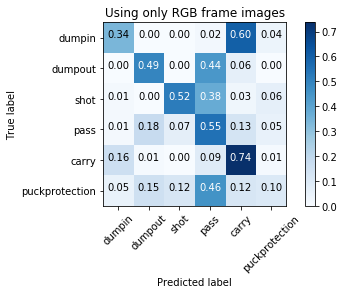

Accuracy for using only RGB frame images is: 52.46%


In [5]:
cfm_rgb_frame = confusion_matrix(rgb_frame_labels, rgb_frame_predictions)
plt.figure()
plot_confusion_matrix(cfm_rgb_frame, classes=['dumpin', 'dumpout', 'shot', 'pass', 'carry', 'puckprotection'], normalize=True,
                      title='Using only RGB frame images')
plt.savefig('cfm_new/rgb_frame.png')
plt.show()
acc_rgb_frame = float(np.sum(np.array(rgb_frame_labels) == np.array(rgb_frame_predictions))) / float(len(rgb_frame_predictions))
print 'Accuracy for using only RGB frame images is: ' + str('%.2f' % (acc_rgb_frame*100)) + '%'

Average precision score using rgb frame: 0.46


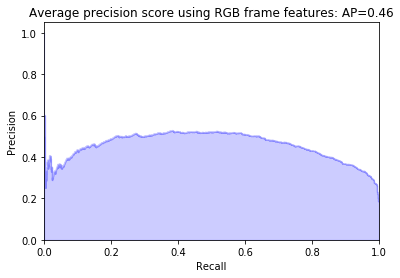

In [6]:
ap_rgb_frame = get_ap(rgb_frame_labels_binary, rgb_frame_scores_new, num_classes, 'RGB frame', 'rgb_frame.png')
print('Average precision score using rgb frame: {0:0.2f}'
      .format(ap_rgb_frame))

In [7]:
num_classes = 6
flow_frame_names = [line.strip() for line in open('experiments_new/for_fusion/motion_frame/no_pretrain_13/video.txt').readlines()]
flow_frame_scores = np.genfromtxt('experiments_new/for_fusion/motion_frame/no_pretrain_13/score.txt', dtype=float)
flow_frame_labels = np.genfromtxt('experiments_new/for_fusion/motion_frame/no_pretrain_13/label.txt', delimiter=' ', dtype=int)
flow_frame_labels_binary = label_binarize(flow_frame_labels, [0, 1, 2, 3, 4, 5])
flow_frame_scores_new = np.zeros((len(flow_frame_names), num_classes))
for i in range(len(flow_frame_names)):
    flow_frame_scores_new[i,  :] = flow_frame_scores[num_classes*i:num_classes*(i+1)]
flow_frame_predictions = np.argmax(flow_frame_scores_new, axis=1)

Normalized confusion matrix
[[0.06       0.         0.02       0.12       0.8        0.        ]
 [0.01298701 0.12987013 0.01298701 0.61038961 0.22077922 0.01298701]
 [0.         0.         0.18181818 0.64935065 0.12987013 0.03896104]
 [0.00842105 0.01684211 0.04       0.72       0.19368421 0.02105263]
 [0.00877193 0.00877193 0.         0.0877193  0.89473684 0.        ]
 [0.         0.05084746 0.03389831 0.76271186 0.10169492 0.05084746]]


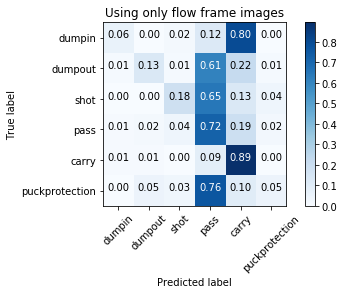

Accuracy for using only flow frame images is: 55.63%


In [8]:
cfm_flow_frame = confusion_matrix(flow_frame_labels, flow_frame_predictions)
plt.figure()
plot_confusion_matrix(cfm_flow_frame, classes=['dumpin', 'dumpout', 'shot', 'pass', 'carry', 'puckprotection'], normalize=True,
                      title='Using only flow frame images')
plt.savefig('cfm_new/flow_frame.png')
plt.show()
acc_flow_frame = float(np.sum(np.array(flow_frame_labels) == np.array(flow_frame_predictions))) / float(len(flow_frame_predictions))
print 'Accuracy for using only flow frame images is: ' + str('%.2f' % (acc_flow_frame*100)) + '%'

Average precision score using flow frame: 0.41


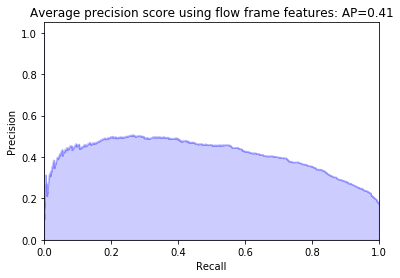

In [9]:
ap_flow_frame = get_ap(flow_frame_labels_binary, flow_frame_scores_new, num_classes, 'flow frame', 'flow_frame.png')
print('Average precision score using flow frame: {0:0.2f}'
      .format(ap_flow_frame))

In [10]:
rgb_grid_names_lines = [line.strip() for line in open('experiments_new/for_fusion/spatial_grid/use_attn_14/video.txt').readlines()]
rgb_grid_names = [line.split('/')[1].split('-frame')[0] for line in rgb_grid_names_lines]
rgb_grid_scores = np.genfromtxt('experiments_new/for_fusion/spatial_grid/use_attn_14/score.txt', dtype=float)
rgb_grid_labels = np.genfromtxt('experiments_new/for_fusion/spatial_grid/use_attn_14/label.txt', delimiter=' ', dtype=int)
rgb_grid_labels_binary = label_binarize(rgb_grid_labels, [0, 1, 2, 3, 4, 5])
rgb_grid_scores_new = np.zeros((len(rgb_grid_names), num_classes))
for i in range(len(rgb_grid_names)):
    rgb_grid_scores_new[i,  :] = rgb_grid_scores[num_classes*i:num_classes*(i+1)]
rgb_grid_predictions = np.argmax(rgb_grid_scores_new, axis=1)

Normalized confusion matrix
[[0.4        0.02       0.         0.06       0.52       0.        ]
 [0.         0.35064935 0.         0.61038961 0.03896104 0.        ]
 [0.         0.         0.58441558 0.33766234 0.01298701 0.06493506]
 [0.03368421 0.13052632 0.09473684 0.58526316 0.09473684 0.06105263]
 [0.20175439 0.01754386 0.         0.25438596 0.52631579 0.        ]
 [0.03389831 0.05084746 0.10169492 0.50847458 0.16949153 0.13559322]]


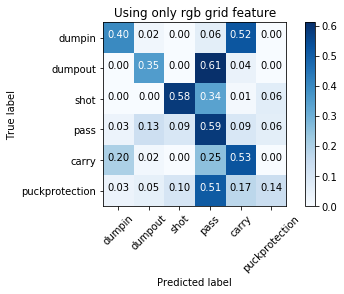

Accuracy for using only rgb grid feature is: 51.41%


In [11]:
cfm_rgb_grid = confusion_matrix(rgb_grid_labels, rgb_grid_predictions)
plt.figure()
plot_confusion_matrix(cfm_rgb_grid, classes=['dumpin', 'dumpout', 'shot', 'pass', 'carry', 'puckprotection'], normalize=True,
                      title='Using only rgb grid feature')
plt.savefig('cfm_new/rgb_grid.png')
plt.show()
acc_rgb_grid = float(np.sum(np.array(rgb_grid_labels) == np.array(rgb_grid_predictions))) / float(len(rgb_grid_predictions))
print 'Accuracy for using only rgb grid feature is: ' + str('%.2f' % (acc_rgb_grid*100)) + '%'

Average precision score using rgb grid feautures: 0.45


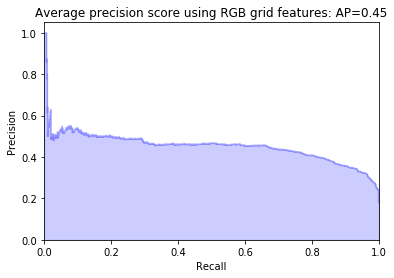

In [12]:
ap_rgb_grid = get_ap(rgb_grid_labels_binary, rgb_grid_scores_new, num_classes, 'RGB grid', 'rgb_grid.png')
print('Average precision score using rgb grid feautures: {0:0.2f}'
      .format(ap_rgb_grid))

In [13]:
flow_grid_names_lines = [line.strip() for line in open('experiments_new/for_fusion/motion_grid/use_attn_14/video.txt').readlines()]
flow_grid_names = [line.split('/')[1].split('-frame')[0] for line in flow_grid_names_lines]
flow_grid_scores = np.genfromtxt('experiments_new/for_fusion/motion_grid/use_attn_14/score.txt', dtype=float)
flow_grid_labels = np.genfromtxt('experiments_new/for_fusion/motion_grid/use_attn_14/label.txt', delimiter=' ', dtype=int)
flow_grid_labels_binary = label_binarize(flow_grid_labels, [0, 1, 2, 3, 4, 5])
flow_grid_scores_new = np.zeros((len(rgb_grid_names), num_classes))
for i in range(len(flow_grid_names)):
    flow_grid_scores_new[i,  :] = flow_grid_scores[num_classes*i:num_classes*(i+1)]
flow_grid_predictions = np.argmax(flow_grid_scores_new, axis=1)

Normalized confusion matrix
[[0.36       0.         0.         0.06       0.58       0.        ]
 [0.         0.54545455 0.         0.38961039 0.02597403 0.03896104]
 [0.02597403 0.         0.57142857 0.28571429 0.01298701 0.1038961 ]
 [0.03157895 0.14947368 0.10526316 0.52421053 0.10947368 0.08      ]
 [0.21052632 0.02631579 0.         0.20175439 0.55263158 0.00877193]
 [0.05084746 0.16949153 0.13559322 0.50847458 0.08474576 0.05084746]]


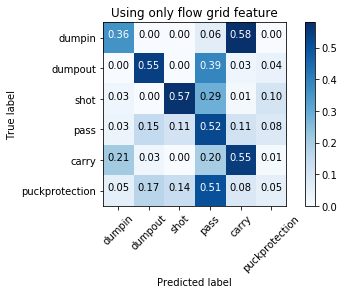

Accuracy for using only flow grid feature is: 49.18%


In [14]:
cfm_flow_grid = confusion_matrix(flow_grid_labels, flow_grid_predictions)
plt.figure()
plot_confusion_matrix(cfm_flow_grid, classes=['dumpin', 'dumpout', 'shot', 'pass', 'carry', 'puckprotection'], normalize=True,
                      title='Using only flow grid feature')
plt.savefig('cfm_new/flow_grid.png')
plt.show()
acc_flow_grid = float(np.sum(np.array(flow_grid_labels) == np.array(flow_grid_predictions))) / float(len(flow_grid_predictions))
print 'Accuracy for using only flow grid feature is: ' + str('%.2f' % (acc_flow_grid*100)) + '%'

Average precision score using flow grid features: 0.44


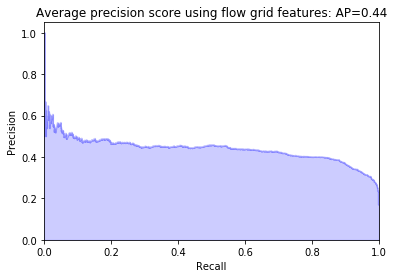

In [15]:
ap_flow_grid = get_ap(flow_grid_labels_binary, flow_grid_scores_new, num_classes, 'flow grid', 'flow_grid.png')
print('Average precision score using flow grid features: {0:0.2f}'
      .format(ap_flow_grid))

In [16]:
dic_rgb_frame, dic_flow_frame, dic_rgb_grid, dic_flow_grid, dic_label = {}, {}, {}, {}, {}
for i, line in enumerate(rgb_frame_names):
    dic_rgb_frame[line] = rgb_frame_scores_new[i, :]
    dic_label[line] = rgb_frame_labels[i]
for i, line in enumerate(flow_frame_names):
    dic_flow_frame[line] = flow_frame_scores_new[i, :]
for i, line in enumerate(rgb_grid_names):
    dic_rgb_grid[line] = rgb_grid_scores_new[i, :]
for i, line in enumerate(flow_grid_names):
    dic_flow_grid[line] = flow_grid_scores_new[i, :]

In [17]:
all_events = dic_rgb_grid.keys()
all_fusion_preds, all_fusion_labels = [], []
all_fusion_scores = np.zeros((len(all_events), num_classes))
for i, event in enumerate(all_events):
    all_fusion_score = dic_rgb_grid[event] + dic_flow_grid[event] + dic_rgb_frame[event] + dic_flow_frame[event]
    all_fusion_pred = np.argmax(all_fusion_score)
    all_fusion_scores[i, :] = all_fusion_score
    all_fusion_preds += all_fusion_pred,
    all_fusion_labels += dic_label[event],
all_fusion_labels_binary = label_binarize(all_fusion_labels, [0, 1, 2, 3, 4, 5])

Normalized confusion matrix
[[0.24       0.         0.         0.02       0.74       0.        ]
 [0.         0.33766234 0.         0.61038961 0.05194805 0.        ]
 [0.01298701 0.         0.49350649 0.45454545 0.02597403 0.01298701]
 [0.01052632 0.10315789 0.05684211 0.68210526 0.12210526 0.02526316]
 [0.06140351 0.00877193 0.         0.0877193  0.84210526 0.        ]
 [0.01694915 0.11864407 0.10169492 0.59322034 0.11864407 0.05084746]]


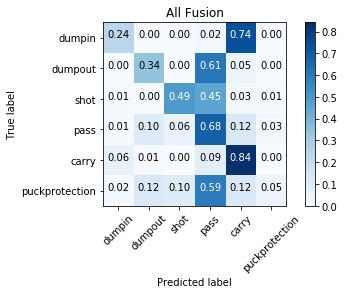

Accuracy for all fusion is: 58.57%


In [18]:
cfm_all_fusion = confusion_matrix(all_fusion_labels, all_fusion_preds)
plt.figure()
plot_confusion_matrix(cfm_all_fusion, classes=['dumpin', 'dumpout', 'shot', 'pass', 'carry', 'puckprotection'], normalize=True,
                      title='All Fusion')
plt.savefig('cfm_new/all_fusion.png')
plt.show()
acc_all_fusion = float(np.sum(np.array(all_fusion_labels) == np.array(all_fusion_preds))) / float(len(all_fusion_preds))
print 'Accuracy for all fusion is: ' + str('%.2f' % (acc_all_fusion*100)) + '%'

Average precision score for score fusion: 0.50


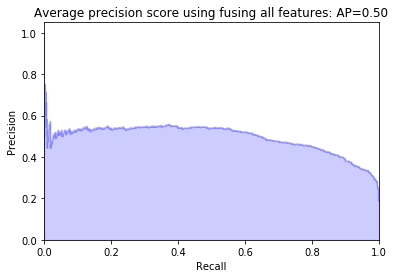

In [27]:
ap_all_fusion = get_ap(all_fusion_labels_binary, all_fusion_scores, num_classes, 'fusing all', 'all_fusion.png')
print('Average precision score for score fusion: {0:0.2f}'
      .format(ap_all_fusion))

In [28]:
fc_fusion_names = [line.strip() for line in open('experiments_new/all_fusion_results_new/video.txt').readlines()]
#fc_fusion_names = [line.split('/')[1].split('-frame')[0] for line in fc_fusion_names_lines]
fc_fusion_scores = np.genfromtxt('experiments_new/all_fusion_results_new/score.txt', dtype=float)
fc_fusion_labels = np.genfromtxt('experiments_new/all_fusion_results_new/label.txt', delimiter=' ', dtype=int)
fc_fusion_labels_binary = label_binarize(fc_fusion_labels, [0, 1, 2, 3, 4, 5])
fc_fusion_scores_new = np.zeros((len(fc_fusion_names), num_classes))
for i in range(len(fc_fusion_names)):
    fc_fusion_scores_new[i,  :] = fc_fusion_scores[num_classes*i:num_classes*(i+1)]
fc_fusion_predictions = np.argmax(fc_fusion_scores_new, axis=1)

Normalized confusion matrix
[[0.34       0.         0.         0.62       0.04       0.        ]
 [0.         0.09090909 0.         0.90909091 0.         0.        ]
 [0.01298701 0.         0.32467532 0.66233766 0.         0.        ]
 [0.02526316 0.04       0.03157895 0.90315789 0.         0.        ]
 [0.         0.         0.         0.14912281 0.85087719 0.        ]
 [0.         0.         0.         0.22033898 0.3559322  0.42372881]]


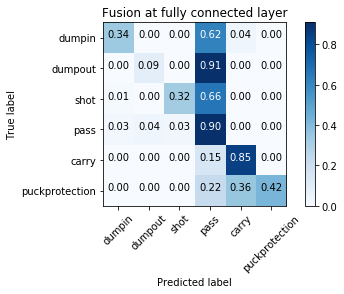

Accuracy for fusion at fully connected layer is: 70.42%


In [29]:
cfm_fc_fusion = confusion_matrix(fc_fusion_labels, fc_fusion_predictions)
plt.figure()
plot_confusion_matrix(cfm_fc_fusion, classes=['dumpin', 'dumpout', 'shot', 'pass', 'carry', 'puckprotection'], normalize=True,
                      title= 'Fusion at fully connected layer')
plt.savefig('cfm_new/fc_fusion.png')
plt.show()
acc_fc_fusion = float(np.sum(np.array(fc_fusion_labels) == np.array(fc_fusion_predictions))) / float(len(fc_fusion_predictions))
print 'Accuracy for fusion at fully connected layer is: ' + str('%.2f' % (acc_fc_fusion*100)) + '%'

Average precision score for fusing at fully connected layer: 0.56


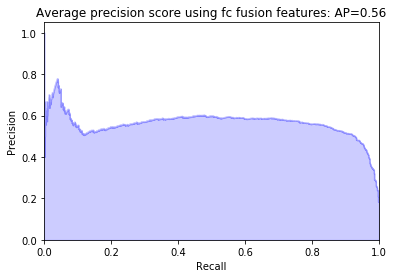

In [30]:
ap_fc_fusion = get_ap(fc_fusion_labels_binary, fc_fusion_scores_new, num_classes, 'fc fusion', 'fc_fusion.png')
print('Average precision score for fusing at fully connected layer: {0:0.2f}'
      .format(ap_fc_fusion))